# PH1978L Final Group Project
Authors: Chiu-Feng Yap, Allison Shay, Joy Yoo

Given a dataset of demographic, lifestyle, social and school related attributes of students, **predict student performance (G3)- (final grade; numeric from 0 to 20)**.

**Three scenarios of predictions will be considered:**
* 1- Classification with two levels (pass/fail)
* 2- Classification with five levels (from I - excellent to V - insufficient)
* 3- Regression, with a numeric output that ranges between 0 and 20

Should include comparison between different machine-learning models (one of which must be linear, and at least 2 non-linear models).

Consider different scenarios (Model 2) where we exclude G1 and G2 variables from our models.

In [2]:
# import libraries we will be using:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import loadtxt
import seaborn as sns
from scipy.stats import chi2_contingency, boxcox
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error
import xgboost

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings 
warnings.filterwarnings(action= 'ignore')

In [3]:
# read in the data
df = pd.read_csv("./Data/school_grades_dataset.csv")
# df = pd.read_csv("/Users/joy4031/OneDrive - The University of Texas Health Science Center at Houston/F21/1978/school_grades_dataset.csv")
# df = pd.read_csv("/Users/hunter/Downloads/school_grades_dataset.csv")

## Exploratory Data Analysis

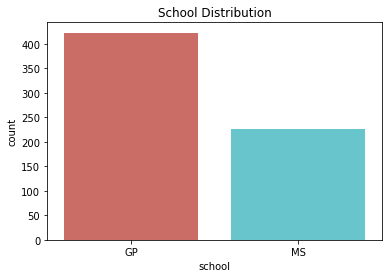

In [11]:
sns.countplot(x='school', data=df, palette='hls')
plt.title('School Distribution')
plt.savefig('school.png', bbox_inches='tight')
plt.show()

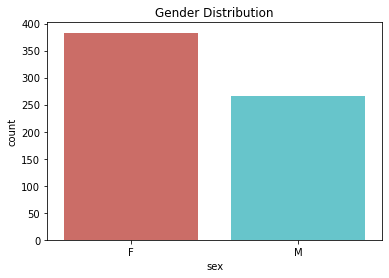

In [12]:
sns.countplot(x='sex', data=df, palette='hls')
plt.title('Gender Distribution')
plt.savefig('gender.png', bbox_inches='tight')
plt.show()

In [13]:
df['age'].describe()

count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

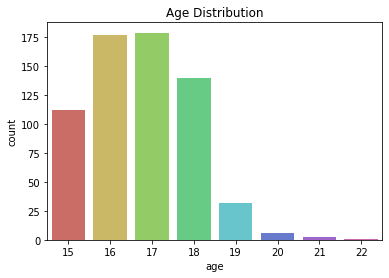

In [15]:
sns.countplot(x = 'age', data=df, order=[15,16,17,18,19,20,21,22], palette='hls')
plt.title('Age Distribution')
plt.savefig('age_plot.png', bbox_inches='tight')
plt.show()

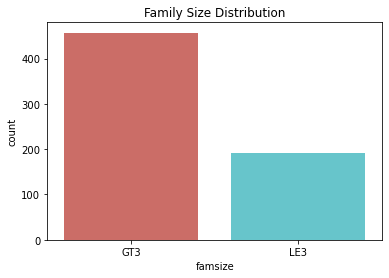

In [17]:
sns.countplot(x='famsize', data=df, palette='hls')
plt.title('Family Size Distribution')
plt.savefig('famsize.png', bbox_inches='tight')
plt.show()

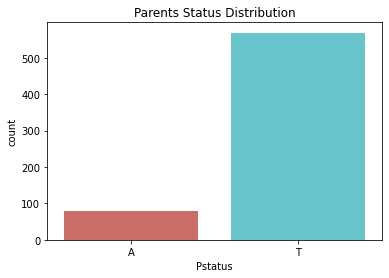

In [18]:
sns.countplot(x='Pstatus', data=df, palette='hls')
plt.title('Parents Status Distribution')
plt.savefig('pstatus.png', bbox_inches='tight')
plt.show()

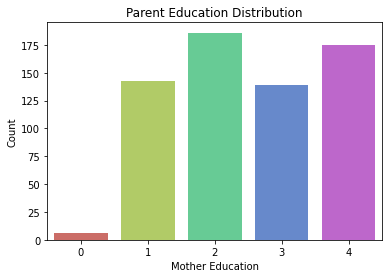

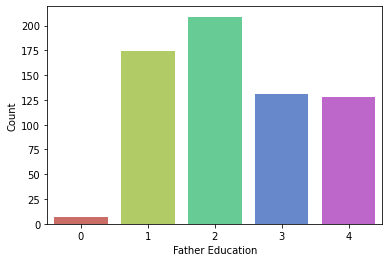

In [19]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Medu', data=df, order=[0,1,2,3,4], palette='hls')
ax = ax.set(ylabel="Count", xlabel="Mother Education")
figure.grid(False)
plt.title('Parent Education Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fedu', data=df, order=[0,1,2,3,4], palette='hls')
ax = ax.set(ylabel="Count", xlabel="Father Education")
figure.grid(False)
plt.savefig('Parent_Education_plot.png', bbox_inches='tight')

In [20]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [21]:
df['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

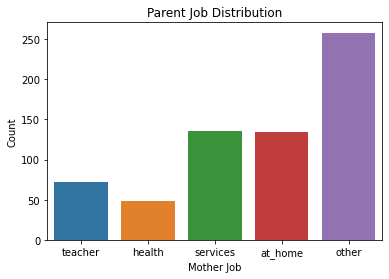

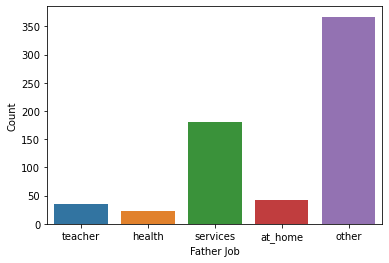

In [22]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=df, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)
plt.title('Parent Job Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=df, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)
plt.savefig('Parent_Job_plot.png', bbox_inches='tight')

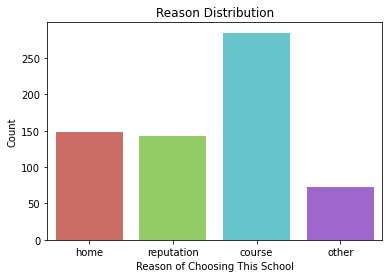

In [24]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'reason', data=df, order=['home','reputation','course','other'], palette='hls')
ax = ax.set(ylabel="Count", xlabel="Reason of Choosing This School")
figure.grid(False)
plt.title('Reason Distribution')
plt.savefig('Reason_plot.png', bbox_inches='tight')

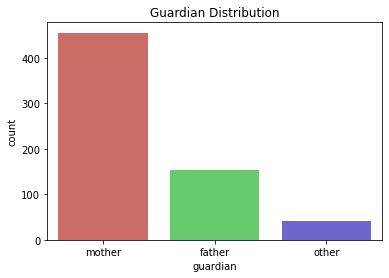

In [25]:
sns.countplot(x = 'guardian', data=df, order=['mother','father','other'], palette='hls')
plt.title('Guardian Distribution')
plt.savefig('Guardian_plot.png', bbox_inches='tight')
plt.show()

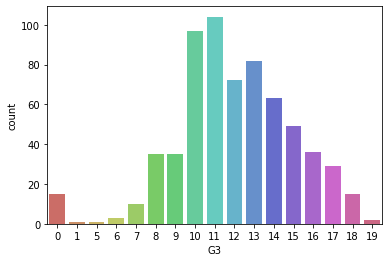

In [59]:
#creating a countplot to show the distribution of G3
sns.countplot(x='G3', data=df, palette='hls')
plt.show()

In [7]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
# let's take a look at missingness
df_missing = missing_values_table(df)
df_missing

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Scenario 1 -  Classification with two levels (pass/fail);

In [3]:
df1 = df.copy()

In [4]:
# create two level categorical variable for classification with two levels (pass/fail)
# create a list of our conditions
conditions = [
    (df['G3'] <= 10),
    (df['G3'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['fail', 'pass' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df1['G3_pass_fail'] = np.select(conditions, values)

In [5]:
df1.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,pass
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13,pass
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13,pass
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,pass
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17,pass
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13,pass


In [6]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
df1.dtypes

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
G3_pass_fail    object
dtype: object

In [8]:
X = df1.drop(['G3', 'G3_pass_fail'], axis=1) # exclude independent variables
y = df1['G3_pass_fail']  # only include dependent variable data

In [9]:
df1_dummy = pd.get_dummies(data=df1, drop_first=True)
df1_dummy.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3_pass_fail_pass
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1


In [10]:
X = df1_dummy.drop(['G3', 'G3_pass_fail_pass'], axis=1)
y = df1_dummy['G3_pass_fail_pass']

In [11]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# numerical features
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Standardization
X_train_stand = X_train.copy() # copy of datasets
X_test_stand = X_test.copy()

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

    
# Normalization
X_train_norm = X_train.copy() # copy of datasets
X_test_norm = X_test.copy()

for i in num_cols:
    norm = MinMaxScaler().fit(X_train_norm[[i]])
    X_train_norm[i] = norm.transform(X_train_norm[[i]])
    X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [12]:
X_train.shape

(486, 41)

In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors":[10,20,50,100,200,300]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train) 


#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Test set score: 0.87
Best parameters: {'n_neighbors': 20}
Best cross-validation score: 0.88
Best estimator:
KNeighborsClassifier(n_neighbors=20)


In [14]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(knn.score(X_test, y_test)))

knn.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(knn.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(knn.score(X_test_stand, y_test)))

knn.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(knn.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(knn.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.90
Test set accuracy RAW: 0.87
Test set accuracy Standardized: 0.84
Test set accuracy Standardized: 0.85
Test set accuracy Normalized: 0.76
Test set accuracy Normalized: 0.77


In [15]:
# Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set RAW: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score RAW: {:.3f}".format(logreg.score(X_test, y_test)))

logreg = LogisticRegression().fit(X_train_stand, y_train)
print("Training set Standardized: {:.3f}".format(logreg.score(X_train_stand, y_train)))
print("Test set score Standardized: {:.3f}".format(logreg.score(X_test_stand, y_test)))

logreg = LogisticRegression().fit(X_train_norm, y_train)
print("Training set Normalized: {:.3f}".format(logreg.score(X_train_norm, y_train)))
print("Test set score Normalized: {:.3f}".format(logreg.score(X_test_norm, y_test)))

Training set RAW: 0.936
Test set score RAW: 0.871
Training set Standardized: 0.936
Test set score Standardized: 0.896
Training set Normalized: 0.889
Test set score Normalized: 0.853


In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
param_grid = {"splitter":['best', 'random'], "max_depth":[5,10,15,20], "min_samples_split": [5,10,15,20], "max_features":['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.87
Best parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 20, 'splitter': 'best'}
Best cross-validation score: 0.88
Best estimator:
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_split=20)


In [17]:
tree = DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=10)
tree.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(tree.score(X_test, y_test)))

tree.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(tree.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(tree.score(X_test_stand, y_test)))

tree.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(tree.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(tree.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.91
Test set accuracy RAW: 0.87
Test set accuracy Standardized: 0.91
Test set accuracy Standardized: 0.90
Test set accuracy Normalized: 0.91
Test set accuracy Normalized: 0.90


In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'max_features': ['auto', 'sqrt','log2'],
        'min_samples_split': [5,10,15,20],
        'n_estimators': [10, 20, 40, 60, 80, 100]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.90
Best parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 20}
Best cross-validation score: 0.92
Best estimator:
RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=20,
                       n_estimators=20)


In [19]:
rf = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt', min_samples_split=15, n_estimators=60)
rf.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(rf.score(X_test, y_test)))

rf.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(rf.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(rf.score(X_test_stand, y_test)))

rf.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(rf.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(rf.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.97
Test set accuracy RAW: 0.91
Test set accuracy Standardized: 0.97
Test set accuracy Standardized: 0.92
Test set accuracy Normalized: 0.96
Test set accuracy Normalized: 0.92


In [20]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'max_features': ['auto', 'sqrt','log2'],
        'min_samples_split': [50, 80, 100, 150],
        'n_estimators': [10, 20, 50, 100, 200]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.91
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 150, 'n_estimators': 20}
Best cross-validation score: 0.92
Best estimator:
GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20)


In [21]:
gb = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20)
gb.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(gb.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(gb.score(X_test, y_test)))

gb.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(gb.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(gb.score(X_test_stand, y_test)))

gb.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(gb.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(gb.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.93
Test set accuracy RAW: 0.91
Test set accuracy Standardized: 0.93
Test set accuracy Standardized: 0.91
Test set accuracy Normalized: 0.93
Test set accuracy Normalized: 0.91


In [22]:
# SVM
from sklearn.svm import SVC
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'sigmoid','poly'],'degree': [2,3,5,7]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.90
Best parameters: {'C': 100, 'degree': 7, 'gamma': 0.001, 'kernel': 'poly'}
Best cross-validation score: 0.92
Best estimator:
SVC(C=100, degree=7, gamma=0.001, kernel='poly')


In [23]:
# SVM scaled
from sklearn.svm import SVC
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'sigmoid','poly'],'degree': [2,3,5,7]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_stand, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test_stand, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.86
Best parameters: {'C': 1000, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.89
Best estimator:
SVC(C=1000, degree=2, gamma=1, kernel='linear')


In [24]:
svc = SVC(C=100, degree=7, gamma=0.001, kernel='poly')
svc.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(svc.score(X_test, y_test)))

svc.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_test_stand, y_test)))

svc.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_test_norm, y_test)))

print("\n")
svc = SVC(C=1000, degree=2, gamma=1, kernel='linear')
svc.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(svc.score(X_test, y_test)))

svc.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_test_stand, y_test)))

svc.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.94
Test set accuracy RAW: 0.90
Test set accuracy Standardized: 0.68
Test set accuracy Standardized: 0.74
Test set accuracy Normalized: 0.68
Test set accuracy Normalized: 0.74


Train set accuracy RAW: 0.95
Test set accuracy RAW: 0.86
Test set accuracy Standardized: 0.95
Test set accuracy Standardized: 0.86
Test set accuracy Normalized: 0.95
Test set accuracy Normalized: 0.85


Test score: 0.908


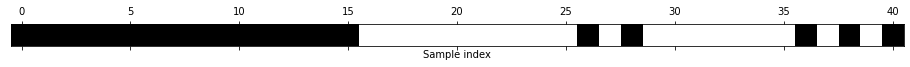

In [25]:
# Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

#transform then apply LogisticRegression
X_test_l1 = select.transform(X_test)
score = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))


In [26]:
# Evaluation method
from sklearn.metrics import classification_report, roc_curve, auc
gb = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20).fit(X_train, y_train)
print(classification_report(y_test, gb.predict(X_test)))

from sklearn.metrics import roc_auc_score
gb_auc = roc_auc_score(y_test, gb.decision_function(X_test))
print("AUC for GB: {:.3f}".format(gb_auc))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.93      0.94      0.94       121

    accuracy                           0.91       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.91      0.91      0.91       163

AUC for GB: 0.956


# Scenario 2 -  Classification with five levels (from I - excellent to V - insufficient)

In [27]:
df2 = df

In [28]:
# create five level categorical variable for classification with five levels (from I - excellent to V - insufficient); and
conditions = [
    (df['G3'] <= 4),
    (df['G3'] > 4) & (df['G3'] <=8),
    (df['G3'] > 8) & (df['G3'] <=12),
    (df['G3'] > 12) & (df['G3'] <=16),
    (df['G3'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = ['I', 'II', 'III', 'IV', 'V' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df2['G3_five_level'] = np.select(conditions, values)

In [29]:
df2_dummy = pd.get_dummies(data=df2, drop_first=True)
df2_dummy.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3_pass_fail_pass,G3_five_level_II,G3_five_level_III,G3_five_level_IV,G3_five_level_V
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0


In [30]:
X = df2.drop(['G3', 'G3_five_level'], axis=1) # exclude independent variables
y = df2['G3_five_level']  # only include dependent variable data


In [31]:
X = df2_dummy.drop(['G3', 'G3_pass_fail_pass'], axis=1)
y = df2_dummy['G3_pass_fail_pass']

In [32]:
df2.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_pass_fail,G3_five_level
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,pass,III
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,pass,III
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,pass,III
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,pass,IV
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,pass,IV


In [33]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# numerical features
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Standardization
X_train_stand = X_train.copy() # copy of datasets
X_test_stand = X_test.copy()

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

    
# Normalization
X_train_norm = X_train.copy() # copy of datasets
X_test_norm = X_test.copy()

for i in num_cols:
    norm = MinMaxScaler().fit(X_train_norm[[i]])
    X_train_norm[i] = norm.transform(X_train_norm[[i]])
    X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [34]:
#Data visualization
#pd.plotting.scatter_matrix(df2, alpha=0.2, figsize=(20,20))

In [35]:
# KNN GridSearchCV
param_grid = {"n_neighbors":range(2,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train) 


#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Test set score: 0.90
Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.87
Best estimator:
KNeighborsClassifier(n_neighbors=7)


In [36]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(knn.score(X_test, y_test)))

knn.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(knn.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(knn.score(X_test_stand, y_test)))

knn.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(knn.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(knn.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.91
Test set accuracy RAW: 0.85
Test set accuracy Standardized: 0.89
Test set accuracy Standardized: 0.82
Test set accuracy Normalized: 0.85
Test set accuracy Normalized: 0.80


In [37]:
# Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set RAW: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score RAW: {:.3f}".format(logreg.score(X_test, y_test)))

logreg = LogisticRegression().fit(X_train_stand, y_train)
print("Training set Standardized: {:.3f}".format(logreg.score(X_train_stand, y_train)))
print("Test set score Standardized: {:.3f}".format(logreg.score(X_test_stand, y_test)))

logreg = LogisticRegression().fit(X_train_norm, y_train)
print("Training set Normalized: {:.3f}".format(logreg.score(X_train_norm, y_train)))
print("Test set score Normalized: {:.3f}".format(logreg.score(X_test_norm, y_test)))

Training set RAW: 0.944
Test set score RAW: 0.890
Training set Standardized: 0.934
Test set score Standardized: 0.890
Training set Normalized: 0.897
Test set score Normalized: 0.847


In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
param_grid = {"splitter":['best', 'random'], "max_depth":[5,10,15,20], "min_samples_split": [5,10,15,20], "max_features":['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.87
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'splitter': 'best'}
Best cross-validation score: 0.88
Best estimator:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=5)


In [39]:
tree = DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=10)
tree.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(tree.score(X_test, y_test)))

tree.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(tree.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(tree.score(X_test_stand, y_test)))

tree.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(tree.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(tree.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.92
Test set accuracy RAW: 0.89
Test set accuracy Standardized: 0.89
Test set accuracy Standardized: 0.90
Test set accuracy Normalized: 0.92
Test set accuracy Normalized: 0.91


In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'max_features': ['auto', 'sqrt','log2'],
        'min_samples_split': [5,10,15,20],
        'n_estimators': [10, 20, 40, 60, 80, 100]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.90
Best parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 20}
Best cross-validation score: 0.93
Best estimator:
RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=10,
                       n_estimators=20)


In [41]:
rf = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt', min_samples_split=15, n_estimators=60)
rf.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(rf.score(X_test, y_test)))

rf.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(rf.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(rf.score(X_test_stand, y_test)))

rf.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(rf.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(rf.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.97
Test set accuracy RAW: 0.91
Test set accuracy Standardized: 0.98
Test set accuracy Standardized: 0.92
Test set accuracy Normalized: 0.97
Test set accuracy Normalized: 0.91


In [42]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'max_features': ['auto', 'sqrt','log2'],
        'min_samples_split': [50, 80, 100, 150],
        'n_estimators': [10, 20, 50, 100, 200]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.90
Best parameters: {'learning_rate': 0.1, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 100, 'n_estimators': 50}
Best cross-validation score: 0.92
Best estimator:
GradientBoostingClassifier(max_depth=30, max_features='sqrt',
                           min_samples_split=100, n_estimators=50)


In [43]:
gb = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20)
gb.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(gb.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(gb.score(X_test, y_test)))

gb.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(gb.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(gb.score(X_test_stand, y_test)))

gb.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(gb.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(gb.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.93
Test set accuracy RAW: 0.91
Test set accuracy Standardized: 0.93
Test set accuracy Standardized: 0.91
Test set accuracy Normalized: 0.93
Test set accuracy Normalized: 0.91


In [44]:
# SVM
from sklearn.svm import SVC
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'sigmoid','poly'],'degree': [2,3,5,7]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.90
Best parameters: {'C': 100, 'degree': 7, 'gamma': 0.001, 'kernel': 'poly'}
Best cross-validation score: 0.91
Best estimator:
SVC(C=100, degree=7, gamma=0.001, kernel='poly')


In [45]:
# SVM scaled
from sklearn.svm import SVC
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'sigmoid','poly'],'degree': [2,3,5,7]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_stand, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test_stand, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.88
Best parameters: {'C': 1000, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.89
Best estimator:
SVC(C=1000, degree=2, gamma=0.001)


In [46]:
svc = SVC(C=100, degree=7, gamma=0.001, kernel='poly')
svc.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(svc.score(X_test, y_test)))

svc.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_test_stand, y_test)))

svc.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_test_norm, y_test)))

print("\n")
svc = SVC(C=1000, degree=2, gamma=1, kernel='linear')
svc.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(svc.score(X_test, y_test)))

svc.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_test_stand, y_test)))

svc.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.94
Test set accuracy RAW: 0.90
Test set accuracy Standardized: 0.68
Test set accuracy Standardized: 0.74
Test set accuracy Normalized: 0.68
Test set accuracy Normalized: 0.74


Train set accuracy RAW: 0.95
Test set accuracy RAW: 0.86
Test set accuracy Standardized: 0.95
Test set accuracy Standardized: 0.86
Test set accuracy Normalized: 0.95
Test set accuracy Normalized: 0.86


Test score: 0.908


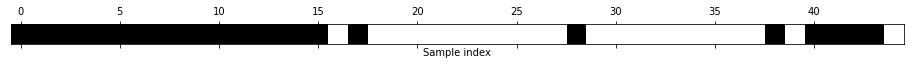

In [47]:
# Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

#transform then apply LogisticRegression
X_test_l1 = select.transform(X_test)
score = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

In [ ]:
# Iterative feature selection

from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=0), 
             n_features_to_select=40) #build 40 models
# (RFE) recursive feature elimination backward eliminate one feature at a time . put the model u want to use (eg.g random forest) bc it's model based
# starts with all features, builds a model, and discards the least important feature according to the model
# then a new model is built using all but the discarded feature, and so on 
# until only a prespecified number of features are left
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index") #all of the original features kept except for just 1
plt.yticks(())
#transform
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
#apply LogisticRegression
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

In [48]:
# Evaluation method
from sklearn.metrics import classification_report, roc_curve, auc
gb = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20).fit(X_train, y_train)
print(classification_report(y_test, gb.predict(X_test)))

from sklearn.metrics import roc_auc_score
gb_auc = roc_auc_score(y_test, gb.decision_function(X_test))
print("AUC for GB: {:.3f}".format(gb_auc))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.93      0.94      0.94       121

    accuracy                           0.91       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.91      0.91      0.91       163

AUC for GB: 0.956


# Scenario 3 - Regression, with a numeric output that ranges between 0 and 20.

In [4]:
df3 = df.copy()

In [5]:
df3.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11


In [6]:
df3 = df3.replace(['yes', 'no'], [1,0])

In [7]:
# create dummy variables for categorical variables
df3 = pd.get_dummies(data=df3, drop_first=True)

In [8]:
X = df3.drop(['G3'], axis=1) # exclude independent variables and variables that have been transformed
y = df3['G3']  # only include dependent variable data

## Split dataset into training and test sets

In [9]:
# Raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# numerical features
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Standardization
X_train_stand = X_train.copy() # copy of datasets
X_test_stand = X_test.copy()

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
    
# Normalization
X_train_norm = X_train.copy() # copy of datasets
X_test_norm = X_test.copy()

for i in num_cols:
    norm = MinMaxScaler().fit(X_train_norm[[i]])
    X_train_norm[i] = norm.transform(X_train_norm[[i]])
    X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [88]:
# Linear Regression
model = LinearRegression()

grid={}
model_cv=GridSearchCV(model,grid,cv=5, scoring='r2')
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RMSE R2 for Raw:', mean_squared_error(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('RMSE for Normalized:', mean_squared_error(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('RMSE for Standardized:', mean_squared_error(y_test, y_pred))

RMSE R2 for Raw: 1.0219634636627322
RMSE for Normalized: 1.0219634636627386
RMSE for Standardized: 1.0219634636627324


In [90]:
# KNN
model = KNeighborsRegressor()

grid={"n_neighbors":range(2,10)}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'n_neighbors': 9}


In [91]:
model = KNeighborsRegressor(n_neighbors= 9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RMSE R2 for Raw:', mean_squared_error(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('RMSE for Normalized:', mean_squared_error(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('RMSE for Standardized:', mean_squared_error(y_test, y_pred))

RMSE R2 for Raw: 1.0815764482431147
RMSE for Normalized: 6.316049382716049
RMSE for Standardized: 1.8308641975308642


In [92]:
# Ridge
from sklearn.linear_model import Ridge
model = Ridge()

grid={"alpha": [0.01, 0.1, 1,10], "solver":['svd', 'cholesky', 'lsqr', 'sag'], "fit_intercept":[False], "normalize":[True, False]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'alpha': 10, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'}


In [94]:
model = Ridge(alpha=10, fit_intercept=False, normalize= True, solver='lsqr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RMSE for Raw:', mean_squared_error(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('RMSE for Normalized:', mean_squared_error(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('RMSE for Standardized:', mean_squared_error(y_test, y_pred))

RMSE for Raw: 1.0154590143099356
RMSE for Normalized: 1.4164730586507241
RMSE for Standardized: 3.677984696930011


In [95]:
# Lasso
from sklearn.linear_model import Lasso
model = Lasso()

grid={'alpha':[0.01, 0.1, 1.0, 10]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'alpha': 0.1}


In [96]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RMSE for Raw:', mean_squared_error(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('RMSE for Normalized:', mean_squared_error(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('RMSE for Standardized:', mean_squared_error(y_test, y_pred))

RMSE for Raw: 0.958191807732146
RMSE for Normalized: 0.9020567357399122
RMSE for Standardized: 0.9202964482127587


In [97]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

grid={"min_samples_split": range(2,10), "splitter":['best', 'random'], "max_depth":range(1,10), "max_features":['auto', 'sqrt', 'log2']}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 9, 'splitter': 'best'}


In [98]:
model = DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_split=9, splitter='best')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RMSE for Raw:', mean_squared_error(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('RMSE for Normalized:', mean_squared_error(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('RMSE for Standardized:', mean_squared_error(y_test, y_pred))

RMSE for Raw: 0.9647524624678012
RMSE for Normalized: 1.3235131462284848
RMSE for Standardized: 1.3235131462284848


In [106]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

grid={'bootstrap': [True, False],
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [10, 20, 40, 60, 80, 100]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 40}


In [109]:
model = RandomForestRegressor(bootstrap= True, max_depth=None, max_features='auto', min_samples_leaf=2, min_samples_split=10, n_estimators=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 1.1657474005177417
Train RMSE for Raw: 0.7823220290977732
Test RMSE for Normalized: 1.1173615564706898
Train RMSE for Normalized: 0.8171218440657871
Test RMSE for Standardized: 1.1350516821587675
Train RMSE for Standardized: 0.7588595362938481


In [111]:
# Gradient Boosted Regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

grid={'learning_rate': [0.01, 0.1, 1.0],
      'n_estimators': [10, 20, 40, 60, 80, 100],
      'min_samples_split': range(2,11),
      'min_samples_leaf': range(1,6),
      'max_depth': range(1,6),
      'random_state': [0],
      'max_features':['auto', 'sqrt', 'log2']
     }
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 40, 'random_state': 0}


In [112]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=2, max_features='auto', min_samples_leaf=4, min_samples_split=9, n_estimators=40, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 0.9187642011053292
Train RMSE for Raw: 1.3488202468780814
Test RMSE for Normalized: 0.9187642011053292
Train RMSE for Normalized: 1.3488202468780814
Test RMSE for Standardized: 0.9187642011053292
Train RMSE for Standardized: 1.3488202468780814


In [113]:
# Support Vector Machine
from sklearn.svm import SVR
model = SVR()

grid={'kernel':['rbf','linear'],
      'gamma':['scale', 'auto']}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'gamma': 'scale', 'kernel': 'linear'}


In [114]:
model = SVR(gamma='scale', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 0.8669893049896692
Train RMSE for Raw: 1.7435690944999038
Test RMSE for Normalized: 0.8874223798921328
Train RMSE for Normalized: 1.9659821729213351
Test RMSE for Standardized: 0.8652689108806527
Train RMSE for Standardized: 1.7493689768652712


In [11]:
#XGBoost
from xgboost import XGBRegressor
model = XGBRegressor()

grid={'learning_rate': [0.01, 0.1],
      'max_depth': [3, 5, 7, 10],
      'min_child_weight': [1, 3, 5],
      'subsample': [0.5, 0.7],
      'colsample_bytree': [0.5, 0.7],
      'n_estimators' : [10, 20, 50, 100, 200],
      'random_state':[0]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'random_state': 0, 'subsample': 0.7}


In [12]:
model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, random_state=0, subsample=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 1.0708973613656483
Train RMSE for Raw: 1.0008668360731543
Test RMSE for Normalized: 1.0708973613656483
Train RMSE for Normalized: 1.0008668360731543
Test RMSE for Standardized: 1.0708973613656483
Train RMSE for Standardized: 1.0008668360731543


#### Model 2

In [13]:
df3_2 = df3.copy()

In [14]:
df3_2.drop(['G1', 'G2'], axis=1, inplace=True)

In [15]:
X = df3_2.drop(['G3'], axis=1) # exclude independent variables and variables that have been transformed
y = df3_2['G3']  # only include dependent variable data

In [16]:
# Raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# numerical features
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Standardization
X_train_stand = X_train.copy() # copy of datasets
X_test_stand = X_test.copy()

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
    
# Normalization
X_train_norm = X_train.copy() # copy of datasets
X_test_norm = X_test.copy()

for i in num_cols:
    norm = MinMaxScaler().fit(X_train_norm[[i]])
    X_train_norm[i] = norm.transform(X_train_norm[[i]])
    X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [121]:
# Linear Regression
model = LinearRegression()

grid={}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RMSE R2 for Raw:', mean_squared_error(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('RMSE for Normalized:', mean_squared_error(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('RMSE for Standardized:', mean_squared_error(y_test, y_pred))

RMSE R2 for Raw: 5.7347982783095395
RMSE for Normalized: 5.734798278309531
RMSE for Standardized: 5.734798278309533


In [122]:
# KNN
model = KNeighborsRegressor()

grid={"n_neighbors":range(2,10)}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'n_neighbors': 9}


In [125]:
model = KNeighborsRegressor(n_neighbors= 9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 6.744539411206078
Train RMSE for Raw: 7.959418635076953
Test RMSE for Normalized: 7.454131054131054
Train RMSE for Normalized: 7.613977497086038
Test RMSE for Standardized: 6.611111111111111
Train RMSE for Standardized: 7.150479316824853


In [124]:
# Ridge
from sklearn.linear_model import Ridge
model = Ridge()

grid={"alpha": [0.01, 0.1, 1,10], "solver":['svd', 'cholesky', 'lsqr', 'sag'], "fit_intercept":[False], "normalize":[True, False]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'alpha': 10, 'fit_intercept': False, 'normalize': False, 'solver': 'sag'}


In [126]:
model = Ridge(alpha=10, fit_intercept=False, normalize= False, solver='sag')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 5.8676980186861805
Train RMSE for Raw: 7.254827561996928
Test RMSE for Normalized: 7.280372400063795
Train RMSE for Normalized: 8.662223704111849
Test RMSE for Standardized: 8.253079751357687
Train RMSE for Standardized: 9.0731968714818


In [127]:
# Lasso
from sklearn.linear_model import Lasso
model = Lasso()

grid={'alpha':[0.01, 0.1, 1.0, 10]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'alpha': 0.1}


In [128]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 5.712996194128071
Train RMSE for Raw: 7.725957587319628
Test RMSE for Normalized: 5.7825714586137735
Train RMSE for Normalized: 8.064056705299326
Test RMSE for Standardized: 5.74887793834814
Train RMSE for Standardized: 7.73756890012838


In [129]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

grid={"min_samples_split": range(2,10), "splitter":['best', 'random'], "max_depth":range(1,10), "max_features":['auto', 'sqrt', 'log2']}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


In [130]:
model = DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_split=2, splitter='best')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 6.426202057117193
Train RMSE for Raw: 8.129675535829737
Test RMSE for Normalized: 6.426202057117193
Train RMSE for Normalized: 8.129675535829737
Test RMSE for Standardized: 6.426202057117193
Train RMSE for Standardized: 8.129675535829737


In [131]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

grid={'bootstrap': [True, False],
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [10, 20, 40, 60, 80, 100]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'bootstrap': False, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [134]:
model = RandomForestRegressor(bootstrap= False, max_depth=70, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 5.204464845085471
Train RMSE for Raw: 0.7327408504602867
Test RMSE for Normalized: 5.445824107905981
Train RMSE for Normalized: 0.6682778259473345
Test RMSE for Standardized: 5.548257601495727
Train RMSE for Standardized: 0.7028182723185616


In [132]:
# Gradient Boosted Regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

grid={'learning_rate': [0.01, 0.1, 1.0],
      'n_estimators': [10, 20, 40, 60, 80, 100],
      'min_samples_split': range(2,11),
      'min_samples_leaf': range(1,6),
      'max_depth': range(1,6),
      'random_state': [0],
      'max_features':['auto', 'sqrt', 'log2']
     }
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 40, 'random_state': 0}


In [135]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=40, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 5.9114138262252975
Train RMSE for Raw: 5.560780733963108
Test RMSE for Normalized: 5.9114138262252975
Train RMSE for Normalized: 5.560780733963108
Test RMSE for Standardized: 5.9114138262252975
Train RMSE for Standardized: 5.560780733963108


In [133]:
# Support Vector Machine
from sklearn.svm import SVR
model = SVR()

grid={'kernel':['rbf','linear'],
      'gamma':['scale', 'auto']}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'gamma': 'auto', 'kernel': 'rbf'}


In [136]:
model = SVR(gamma='auto', kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 6.1723961631845174
Train RMSE for Raw: 7.153661835900467
Test RMSE for Normalized: 5.880164487756523
Train RMSE for Normalized: 8.052106469434934
Test RMSE for Standardized: 5.709657375473442
Train RMSE for Standardized: 6.9192411339890425


In [17]:
#XGBoost
from xgboost import XGBRegressor
model = XGBRegressor()

grid={'learning_rate': [0.01, 0.1],
      'max_depth': [3, 5, 7, 10],
      'min_child_weight': [1, 3, 5],
      'subsample': [0.5, 0.7],
      'colsample_bytree': [0.5, 0.7],
      'n_estimators' : [10, 20, 50, 100, 200],
      'random_state':[0]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

Best parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'random_state': 0, 'subsample': 0.5}


In [18]:
model = XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50, random_state=0, subsample=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('Test RMSE for Raw:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Raw:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)
print('Test RMSE for Normalized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Normalized:', mean_squared_error(y_train, y_pred_train))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
y_pred_train = model.predict(X_train_stand)
print('Test RMSE for Standardized:', mean_squared_error(y_test, y_pred))
print('Train RMSE for Standardized:', mean_squared_error(y_train, y_pred_train))

Test RMSE for Raw: 5.4137848971212845
Train RMSE for Raw: 4.879338633574897
Test RMSE for Normalized: 5.4137848971212845
Train RMSE for Normalized: 4.879338633574897
Test RMSE for Standardized: 5.4137848971212845
Train RMSE for Standardized: 4.879338633574897
